In [1]:
#TODO: Use Dataset Generator to generate customized dataset

In [2]:
#TODO: create customed anno, anno_dict from raw csv
#input is csv annotation file
#output is anno, anno_dict

import pandas as pd
import cv2
import numpy as np
import glob
import os
import pickle

import namespace
import log_parser
import youtubebb_converter
import imagenet_converter
import dataset_generator
import metric_map
import predictor
import utils


reload(utils)
reload(log_parser)
reload(namespace)
reload(youtubebb_converter)
reload(predictor)
reload(dataset_generator)

from matplotlib import pyplot as plt
%matplotlib inline


In [3]:

LogParser = log_parser.LogParser()
#ONLY run once, results will be written into FILEPATH_YOUTUBE_VID_METAINFO
#LogParser.runsh_get_videometainfo(namespace.FILEPATH_SCRIPTS_GETINFO, namespace.DIRPATH_YOUTUBE_VIDEOS, namespace.FILEPATH_YOUTUBE_VID_METAINFO)
_, vidinfo_dict, _ = LogParser.parse_video_metainfo(namespace.FILEPATH_YOUTUBE_VID_METAINFO)

YConverter = youtubebb_converter.YoutubeBBConverter(vidinfo_dict)
mAP = metric_map.mAP()
Pred  = predictor.Predictor()

#only run once to create processed Youtube annotation dict, write to FILEPATH_YOUTUBE_YANNODICT
#YConverter.parse_annotation(namespace.FILEPATH_YOUTUBE_RAWANNOCSV, namespace.FILEPATH_YOUTUBE_YANNODICT)
yanno, yanno_dict = YConverter.load_annotation(namespace.FILEPATH_YOUTUBE_YANNODICT)

DatGen = dataset_generator.DatasetGenerator(YConverter, mAP, Pred, yanno_dict)

#for debuging purpose only
df = pd.DataFrame.from_csv('./data/YOUTUBE_data/yt_bb_detection_train.csv', header=None)
df1 = pd.read_pickle('./data/YOUTUBE_data/yt_bb_detection_train_filtered.pkl.gz', compression='gzip')
                            #./data/YOUTUBE_data/yt_bb_detection_train_filtered.csv


ssd/ssd.py:34: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  self.priors = Variable(self.priorbox.forward(), volatile=True)


Loading weights into state dict...
Finished!


/home/u9167/.conda/envs/env_torch/lib/python2.7/site-packages/ipykernel_launcher.py:18: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls


In [4]:
#sample code to use the DatGen
vid_wildcard = namespace.DIRPATH_YOUTUBE_VIDEOS + '/' + '4/akQU-s0RCWE+4+2.mp4'
segpred_dict = pickle.load(open(namespace.FILEPATH_YOUTUBE_SEGMENT_PREDRESULT))

DatGen.create_segment_predresult_dict(namespace.FILEPATH_YOUTUBE_SEGMENT_PREDRESULT, vid_wildcard)

In [18]:
vid_filepath = '/home/u9167/content_aware/data/YOUTUBE_data/videos/4/akQU-s0RCWE+4+2.mp4'
y_list = []
X_list = []
gt_list = []
for img_idx in range(10):
    X, y, gt, pred = DatGen.get_dat(segpred_dict, vid_filepath, img_idx)
    y_list.append(y)
    X_list.append(X)
    gt_list.append(gt[0])

In [19]:
for y in y_list:
    y = np.array(y, dtype=int)
    print y

[1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1]
[1 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1]
[1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1]
[1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 1]
[1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1]
[1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1]
[1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1]
[1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0]
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1]
[1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1]


(0.0, 1.0, 0.0, 1.0)

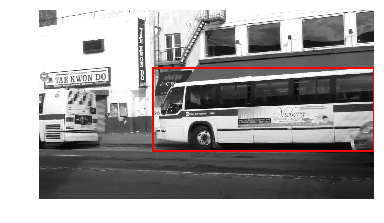

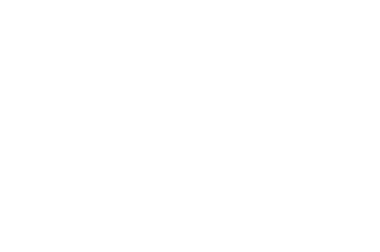

In [25]:
idx = 5
utils.plot_bbox(plt, X_list[idx], gt_list[idx][0])
utils.plot_bbox(plt, X_list[idx], gt_list[idx][0])


In [21]:
gt_list[idx]

[(0.0, 4, 1.0, 0.728, 0.26, 1.0, 0.66833335)]